## Machine Learning for Scheme of Square Prediction

### Reading database (DB) and Printing the information out...

In [136]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
import random

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from pathlib import Path

# Statistical and machine learning models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Other libraries
import shap
from scipy.stats import pearsonr
from rdkit import Chem

data = pd.read_csv("dataset.csv")
data

,name,pz_C2_pop,px_O_pop,NBO_C_diazo,NBO_N1,NBO_N2,NBO_C_carbonyl,NBO_O,HOMO,ΔG,ΔG_fromAdd,adduct,ΔG-ΔG_O,ΔG_O,ΔG_C_fromDiazo,ΔG_C,ΔG-ΔG_C,BCl3_Role,ΔΔG,Overall performance
0,16_17,1.25984,1.86131,-0.089,0.086,0.080,0.547,-0.599,-7.221,29.64,41.05,-11.41,14.54,15.11,11.40,22.81,6.83,1,7.71,14.54
1,8_19,1.28716,1.80090,-0.140,0.119,0.160,0.631,-0.533,-7.976,30.58,26.02,4.55,14.12,16.46,24.22,24.22,6.36,1,7.76,14.12
2,18_19,1.18824,1.85751,-0.105,0.090,0.089,0.547,-0.595,-7.511,30.79,41.15,-10.36,14.40,16.39,14.84,25.19,5.60,1,8.81,14.40
3,19_4,1.16975,1.86966,0.348,0.005,0.079,0.477,-0.569,-8.086,22.05,30.74,-8.69,-4.31,26.36,9.82,18.50,3.55,1,-7.86,3.55
4,19_8,1.23926,1.85916,0.009,0.091,0.188,0.537,-0.529,-8.665,33.71,35.42,-1.71,-3.02,36.73,27.60,29.31,4.40,1,-7.42,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,13_1,1.25261,1.79253,-0.626,0.086,0.062,0.798,-0.360,-8.102,38.63,44.04,-5.41,4.59,34.04,10.57,15.98,22.65,1,-18.06,22.65
479,8_15,1.32023,1.79866,-0.537,0.093,0.127,0.611,0.036,-8.378,7.26,6.56,0.70,6.66,0.60,15.82,15.82,-8.56,1,15.22,6.66
480,4_9,1.37984,1.80452,-0.567,0.124,0.191,0.925,-0.270,-9.040,35.62,30.28,5.34,-8.13,43.76,28.68,28.68,6.94,1,-15.07,6.94
481,12_1,1.32138,1.70549,-0.647,0.083,0.046,0.797,-0.359,-8.060,38.31,42.56,-4.25,-5.44,43.75,8.14,12.39,25.92,1,-31.36,25.92


In [137]:
db = df = data

df.columns

Index(['name', 'pz_C2_pop', 'px_O_pop', 'NBO_C_diazo', 'NBO_N1', 'NBO_N2',
       'NBO_C_carbonyl', 'NBO_O', 'HOMO', 'ΔG', 'ΔG_fromAdd', 'adduct',
       'ΔG-ΔG_O', 'ΔG_O', 'ΔG_C_fromDiazo', 'ΔG_C', 'ΔG-ΔG_C', 'BCl3_Role',
       'ΔΔG', 'Overall performance'],
      dtype='object')

In [138]:
df.to_excel('data.xlsx', index=False, engine='openpyxl')


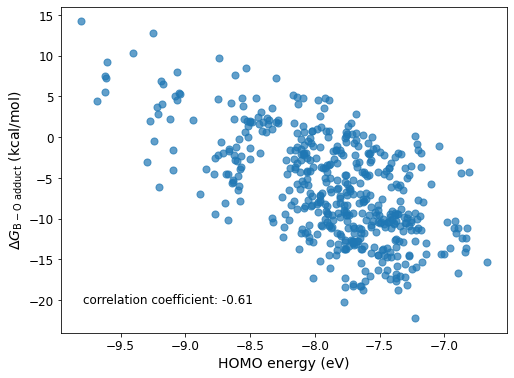

In [139]:
corr_coef, _ = pearsonr(db['HOMO'], db['adduct'])

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(db['HOMO'], db['adduct'], alpha=0.7, s=50)
plt.xlabel('HOMO energy (eV)', fontsize=14)
plt.ylabel(r'$\Delta G_{\mathrm{B-O \ adduct}}$ (kcal/mol)', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate with the correlation coefficient
plt.annotate(f'correlation coefficient: {corr_coef:.2f}', xy=(0.05, 0.08), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='bottom')

# Save the plot
plt.savefig('HOMO-adduct.png', dpi=800)

# Show the plot
plt.show()

# Close the plot
plt.close()


In [140]:
db.columns

Index(['name', 'pz_C2_pop', 'px_O_pop', 'NBO_C_diazo', 'NBO_N1', 'NBO_N2',
       'NBO_C_carbonyl', 'NBO_O', 'HOMO', 'ΔG', 'ΔG_fromAdd', 'adduct',
       'ΔG-ΔG_O', 'ΔG_O', 'ΔG_C_fromDiazo', 'ΔG_C', 'ΔG-ΔG_C', 'BCl3_Role',
       'ΔΔG', 'Overall performance'],
      dtype='object')

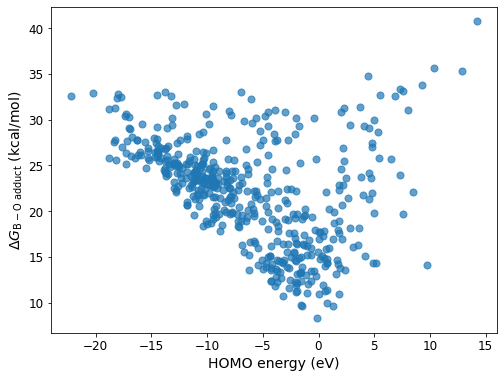

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(db['adduct'], db['ΔG_C'], alpha=0.7, s=50)
#plt.title('X-Y Scatter Plot' , fontsize=12)
plt.xlabel('HOMO energy (eV)', fontsize=14)
plt.ylabel(r'$\Delta G_{\mathrm{B-O \ adduct}}$ (kcal/mol)', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.show()
plt.savefig('adduct-DeltaGC.png' , dpi=800)

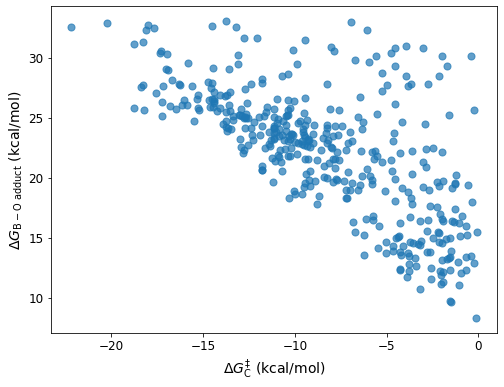

In [35]:
negative_adducts = db[db['adduct'] < 0]
double_dagger = '\u2021'
plt.figure(figsize=(8, 6))
plt.scatter(negative_adducts['adduct'], negative_adducts['ΔG_C'], alpha=0.7, s=50)
plt.xlabel(f'$\Delta G^{double_dagger}_{{\mathrm{{C}}}}$ (kcal/mol)', fontsize=14)
plt.ylabel(r'$\Delta G_{\mathrm{B-O \ adduct}}$ (kcal/mol)', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('adduct-DeltaGC-.png', dpi=800)

In [41]:
for u in ('16_20','16_17','7_2','2_4','2_7','2_8','2_12','2_15', '12_7','12_8','4_7'):
    sampleName = u

    item = data[data['name'] == sampleName]

    rowIndexnp = np.where(db["name"] == sampleName)
    rowIndex = rowIndexnp[0][0]

    ΔΔG = item._get_value(rowIndex, 'ΔΔG')
    Add = item._get_value(rowIndex, 'adduct')
    R_from_diazo = item._get_value(rowIndex, 'ΔG_C_fromDiazo')
    ΔG = item._get_value(rowIndex, 'ΔG')
    ΔG_catalyst = item._get_value(rowIndex, 'ΔG_O')
    ΔG_R = item._get_value(rowIndex, 'ΔG_C')
    NBO_diazo = item._get_value(rowIndex, 'NBO_C_diazo')
    NBO_carbpnyl = item._get_value(rowIndex, 'NBO_C_carbonyl')
    HOMO = item._get_value(rowIndex, 'HOMO')

    
    print("{}: ΔG:{:.1f}, ΔG_O:{:.1f},  ΔG_C:{:.1f}, ΔΔG:{:.1f} Add:{:.1f} ΔG_C-from_Di {:.2f} NBO_C1 {:.2f} NBO_C2 {:.2f}, HOMO:{:.2f}".format(sampleName,ΔG,ΔG_catalyst, ΔG_R, ΔΔG, Add, R_from_diazo, NBO_carbpnyl, NBO_diazo, HOMO))


16_20: ΔG:29.4, ΔG_O:10.1,  ΔG_C:24.2, ΔΔG:14.0 Add:-11.1 ΔG_C-from_Di 13.02 NBO_C1 0.54 NBO_C2 -0.09, HOMO:-6.89
16_17: ΔG:29.6, ΔG_O:15.1,  ΔG_C:22.8, ΔΔG:7.7 Add:-11.4 ΔG_C-from_Di 11.40 NBO_C1 0.55 NBO_C2 -0.09, HOMO:-7.22
7_2: ΔG:32.6, ΔG_O:15.6,  ΔG_C:15.4, ΔΔG:-0.2 Add:-2.2 ΔG_C-from_Di 13.22 NBO_C1 0.43 NBO_C2 -0.11, HOMO:-8.08
2_4: ΔG:19.5, ΔG_O:25.3,  ΔG_C:22.1, ΔΔG:-3.2 Add:-12.8 ΔG_C-from_Di 9.24 NBO_C1 0.49 NBO_C2 0.34, HOMO:-8.02
2_7: ΔG:35.1, ΔG_O:36.9,  ΔG_C:30.7, ΔΔG:-6.2 Add:-10.1 ΔG_C-from_Di 20.55 NBO_C1 0.56 NBO_C2 -0.23, HOMO:-8.67
2_8: ΔG:32.0, ΔG_O:34.3,  ΔG_C:28.5, ΔΔG:-5.8 Add:-4.0 ΔG_C-from_Di 24.51 NBO_C1 0.55 NBO_C2 0.01, HOMO:-9.09
2_12: ΔG:15.7, ΔG_O:6.7,  ΔG_C:24.7, ΔΔG:18.0 Add:-15.5 ΔG_C-from_Di 9.22 NBO_C1 0.51 NBO_C2 0.23, HOMO:-7.65
2_15: ΔG:9.9, ΔG_O:0.9,  ΔG_C:31.3, ΔΔG:30.4 Add:-18.3 ΔG_C-from_Di 13.05 NBO_C1 0.53 NBO_C2 0.05, HOMO:-7.64
12_7: ΔG:32.8, ΔG_O:42.9,  ΔG_C:19.4, ΔΔG:-23.5 Add:-0.6 ΔG_C-from_Di 18.80 NBO_C1 0.82 NBO_C2 -0.26, HOMO:-8.

In [43]:
data['x'] = data['name'].apply(lambda x: int(x.split('_')[0]))
data['y'] = data['name'].apply(lambda x: int(x.split('_')[1]))

In [44]:
data = pd.read_csv('dataset.csv')

name_mapping = {
    7: 'H',
    17: 'Me',
    18: 't-Bu',
    4: 'F',
    5: 'Cl',
    6: 'Br',
    3:  r'CF$_3$',
    1: r'NO$_2$',
    2: 'CN',
    15: r'CH=CH$_2$',
    16: 'C$\equiv$CH',
    21: 'OMe',
    20: 'OPh',
    19: 'OPh-4-F',
    22: r'NMe$_2$',
    13: 'Ph',
    12: 'Ph-4-F',
    10: 'Ph-3-F',
    11: 'Ph-2-F',
    14: 'Ph-4-OMe',
    9: r'Ph-4-NO$_2$',
    8: '2-pyridyl'
}



In [45]:
data['x'] = data['name'].apply(lambda x: int(x.split('_')[0]))
data['y'] = data['name'].apply(lambda x: int(x.split('_')[1]))

# Define the mapping
order_mapping = {
    1: 7,
    2: 17,
    3: 18,
    4: 4,
    5: 5,
    6: 6,
    7: 3,
    8: 1,
    9: 2,
    10: 15,
    11: 16,
    12: 21,
    13: 20,
    14: 19,
    15: 22,
    16: 13,
    17: 12,
    18: 10,
    19: 11,
    20: 14,
    21: 9,
    22: 8
}

# Apply the mapping to x and y columns
data['x_mapped'] = data['x'].map(order_mapping)
data['y_mapped'] = data['y'].map(order_mapping)

plt.figure(figsize=(12, 12))

for index, row in data.iterrows():
    x = row['x_mapped']
    y = row['y_mapped']
    value = row['ΔΔG']
    
    size = abs(value) * 12  # Adjust the scaling factor as needed
    
    if value >= 0:
        color = 'green'
    else:
        color = 'orange'
    
    plt.scatter(x, y, s=size, color=color, alpha=0.7)

# Assuming name_mapping is defined elsewhere in your code
plt.xticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.yticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.xlabel(r'R$_1$', fontsize=18)
plt.ylabel(r'R$_2$', fontsize=18)
plt.xticks(rotation=80)
plt.grid(False)
plt.savefig('pathC-pathO.png', dpi=500, bbox_inches='tight')
plt.close()
plt.show()

In [46]:
data['x'] = data['name'].apply(lambda x: int(x.split('_')[0]))
data['y'] = data['name'].apply(lambda x: int(x.split('_')[1]))

# Define the mapping
order_mapping = {
    1: 7,
    2: 17,
    3: 18,
    4: 4,
    5: 5,
    6: 6,
    7: 3,
    8: 1,
    9: 2,
    10: 15,
    11: 16,
    12: 21,
    13: 20,
    14: 19,
    15: 22,
    16: 13,
    17: 12,
    18: 10,
    19: 11,
    20: 14,
    21: 9,
    22: 8
}

# Apply the mapping to x and y columns
data['x_mapped'] = data['x'].map(order_mapping)
data['y_mapped'] = data['y'].map(order_mapping)

plt.figure(figsize=(12, 12))

for index, row in data.iterrows():
    x = row['x_mapped']
    y = row['y_mapped']
    value = row['ΔG-ΔG_O']
    
    size = abs(value) * 12  # Adjust the scaling factor as needed
    
    if value >= 0:
        color = '#008080'  # Teal for non-negative values
    else:
        color = 'red'  # Red for negative values
    
    plt.scatter(x, y, s=size, color=color, alpha=0.7)

# Assuming name_mapping is defined elsewhere in your code
plt.xticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.yticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.xlabel(r'R$_1$', fontsize=18)
plt.ylabel(r'R$_2$', fontsize=18)
plt.xticks(rotation=80)
plt.grid(False)
plt.savefig('pathO.png', dpi=500, bbox_inches='tight')
plt.close()
plt.show()

In [47]:
data['x'] = data['name'].apply(lambda x: int(x.split('_')[0]))
data['y'] = data['name'].apply(lambda x: int(x.split('_')[1]))

# Define the mapping
order_mapping = {
    1: 7,
    2: 17,
    3: 18,
    4: 4,
    5: 5,
    6: 6,
    7: 3,
    8: 1,
    9: 2,
    10: 15,
    11: 16,
    12: 21,
    13: 20,
    14: 19,
    15: 22,
    16: 13,
    17: 12,
    18: 10,
    19: 11,
    20: 14,
    21: 9,
    22: 8
}

# Apply the mapping to x and y columns
data['x_mapped'] = data['x'].map(order_mapping)
data['y_mapped'] = data['y'].map(order_mapping)

plt.figure(figsize=(12, 12))

for index, row in data.iterrows():
    x = row['x_mapped']
    y = row['y_mapped']
    value = row['ΔG-ΔG_C']
    
    size = abs(value) * 12  # Adjust the scaling factor as needed
    
    if value >= 0:
        color = '#4169E1'  # Royal Blue for non-negative values
    else:
        color = 'red'  # Red for negative values
    
    plt.scatter(x, y, s=size, color=color, alpha=0.7)

# Assuming name_mapping is defined elsewhere in your code
plt.xticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.yticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.xlabel(r'R$_1$', fontsize=18)
plt.ylabel(r'R$_2$', fontsize=18)
plt.xticks(rotation=80)
plt.grid(False)
plt.savefig('pathC.png', dpi=500, bbox_inches='tight')
plt.close()
plt.show()

In [48]:
data['x'] = data['name'].apply(lambda x: int(x.split('_')[0]))
data['y'] = data['name'].apply(lambda x: int(x.split('_')[1]))

# Define the mapping
order_mapping = {
    1: 7,
    2: 17,
    3: 18,
    4: 4,
    5: 5,
    6: 6,
    7: 3,
    8: 1,
    9: 2,
    10: 15,
    11: 16,
    12: 21,
    13: 20,
    14: 19,
    15: 22,
    16: 13,
    17: 12,
    18: 10,
    19: 11,
    20: 14,
    21: 9,
    22: 8
}

# Apply the mapping to x and y columns
data['x_mapped'] = data['x'].map(order_mapping)
data['y_mapped'] = data['y'].map(order_mapping)

plt.figure(figsize=(12, 12))

for index, row in data.iterrows():
    x = row['x_mapped']
    y = row['y_mapped']
    value = row['Overall performance']
    
    size = abs(value) * 12  # Adjust the scaling factor as needed
    
    if value >= 0:
        color = '#2C3539'  # Gunmetal Gray for non-negative values
    else:
        color = 'red'  # Red for negative values
    
    plt.scatter(x, y, s=size, color=color, alpha=0.7)

# Assuming name_mapping is defined elsewhere in your code
plt.xticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.yticks(range(1, 23), [name_mapping.get(i, '') for i in range(1, 23)], fontsize=16)
plt.xlabel(r'R$_1$', fontsize=18)
plt.ylabel(r'R$_2$', fontsize=18)
plt.xticks(rotation=80)
plt.grid(False)
plt.savefig('Overall performance.png', dpi=500, bbox_inches='tight')
plt.close()
plt.show()

(-5.0, 60.0)

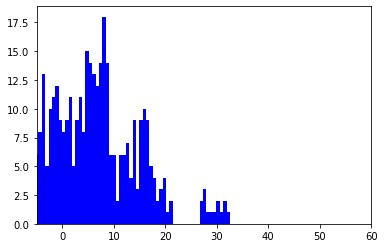

In [49]:

plt.hist(db['ΔΔG'], bins=100, label='', color='b')
plt.xlim(-5,60)


In [59]:
df.columns

Index(['name', 'pz_C2_pop', 'px_O_pop', 'NBO_C_diazo', 'NBO_N1', 'NBO_N2',
       'NBO_C_carbonyl', 'NBO_O', 'HOMO', 'ΔG', 'ΔG_fromAdd', 'adduct',
       'ΔG-ΔG_O', 'ΔG_O', 'ΔG_C_fromDiazo', 'ΔG_C', 'ΔG-ΔG_C', 'BCl3_Role',
       'ΔΔG', 'Overall performance'],
      dtype='object')

In [124]:
# Linear Regression model 
features = ['pz_C2_pop', 'px_O_pop', 'NBO_C_diazo', 'NBO_N1', 'NBO_N2', 'NBO_C_carbonyl', 'NBO_O', 'HOMO']
target = 'ΔΔG'

X = data[features]
y = data[target]

In [125]:
# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


# Optionally, get the coefficients explicitly
coefficients = model.params
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:                    ΔΔG   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          6.41e-111
Time:                        14:59:18   Log-Likelihood:                -1579.4
No. Observations:                 483   AIC:                             3177.
Df Residuals:                     474   BIC:                             3214.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             87.3441     12.691      6.

# Machine Learning

In [4]:
features = ['pz_C2_pop', 'px_O_pop', 'NBO_C_diazo', 'NBO_N1', 'NBO_N2', 'NBO_C_carbonyl', 'NBO_O', 'HOMO']
target = 'ΔΔG'

X = data[features]
y = data[target]

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features (important for models like SVM and MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)
print(f"Linear Regression - MAE: {mae_lr}, R2: {r2_lr}")

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)
print(f"Decision Tree - MAE: {mae_dt}, R2: {r2_dt}")

# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
r2_svm = r2_score(y_test, y_test_pred_svm)
print(f"SVM - MAE: {mae_svm}, R2: {r2_svm}")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
r2_knn = r2_score(y_test, y_test_pred_knn)
print(f"KNN - MAE: {mae_knn}, R2: {r2_knn}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
r2_gb = r2_score(y_test, y_test_pred_gb)
print(f"Gradient Boosting - MAE: {mae_gb}, R2: {r2_gb}")

# Neural Network (MLP)
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)
y_train_pred_mlp = mlp_model.predict(X_train)
y_test_pred_mlp = mlp_model.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
r2_mlp = r2_score(y_test, y_test_pred_mlp)
print(f"Neural Network (MLP) - MAE: {mae_mlp}, R2: {r2_mlp}")

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, R2: {r2_rf}")

Linear Regression - MAE: 4.729785971910653, R2: 0.7340129846697158
Decision Tree - MAE: 2.867123287671233, R2: 0.8795681701737877
SVM - MAE: 5.564585846813879, R2: 0.6598915186979906
KNN - MAE: 3.6307123287671224, R2: 0.834073415223832
Gradient Boosting - MAE: 3.002272251216673, R2: 0.9069053736455452
Neural Network (MLP) - MAE: 4.314006381566319, R2: 0.8198106037265851
Random Forest - MAE: 2.859923287671233, R2: 0.9039816121717955


In [141]:

print("\033[1;35m Descriptive statistics to summarize the distribution of target values:")

target_data = data.drop(['name', 'pz_C2_pop', 'px_O_pop', 'NBO_C_diazo',
       'NBO_N1', 'NBO_N2', 'NBO_C_carbonyl', 'NBO_O', 'HOMO', 'ΔG',
       'ΔG_fromAdd', 'adduct', 'ΔG-ΔG_O', 'ΔG_O', 'ΔG_C_fromDiazo', 'ΔG_C',
       'ΔG-ΔG_C', 'BCl3_Role', 'Overall performance'], axis=1)

target_vars = target_data.columns
target_data.describe()


 Descriptive statistics to summarize the distribution of target values:


,ΔΔG
count,483.000000
mean,1.827660
std,11.197676
min,-32.680000
25%,-6.285000
50%,2.150000
75%,8.675000
max,32.540000


In [142]:
#X = data.drop(['name', 'ΔG','ΔG_fromAdd', 'adduct', 'ΔG-ΔG_O', 'ΔG_O', 'ΔG_C_fromDiazo', 'ΔG_C', 'ΔG-ΔG_C', 'BCl3_Role', 'Overall performance', 'ΔΔG'], axis=1)

X = data.drop(['name', 'ΔG','ΔG_fromAdd','px_O_pop','NBO_N1','NBO_N2','pz_C2_pop','NBO_O','adduct', 'ΔG-ΔG_O', 'ΔG_O', 'ΔG_C_fromDiazo', 'ΔG_C',
       'ΔG-ΔG_C', 'BCl3_Role', 'Overall performance', 'ΔΔG'], axis=1)
X

,NBO_C_diazo,NBO_C_carbonyl,HOMO
0,-0.089,0.547,-7.221
1,-0.140,0.631,-7.976
2,-0.105,0.547,-7.511
3,0.348,0.477,-8.086
4,0.009,0.537,-8.665
...,...,...,...
478,-0.626,0.798,-8.102
479,-0.537,0.611,-8.378
480,-0.567,0.925,-9.040
481,-0.647,0.797,-8.060


In [197]:
data_new = pd.concat([X, target_data],axis=1)
data_new

,NBO_C_diazo,NBO_C_carbonyl,HOMO,ΔΔG
0,-0.089,0.547,-7.221,7.71
1,-0.140,0.631,-7.976,7.76
2,-0.105,0.547,-7.511,8.81
3,0.348,0.477,-8.086,-7.86
4,0.009,0.537,-8.665,-7.42
...,...,...,...,...
478,-0.626,0.798,-8.102,-18.06
479,-0.537,0.611,-8.378,15.22
480,-0.567,0.925,-9.040,-15.07
481,-0.647,0.797,-8.060,-31.36


In [219]:
data_new = data_new.sample(frac=1)
rnd = random.randint(0, 999)
train_set, test_set = train_test_split(data_new, shuffle=True,
                                       random_state=rnd,
                                       test_size=0.15)
# from the train_set we remove target_vars columns meaning that just the fingerprints remains as X value
X_trainset = train_set.drop(columns=target_vars).to_numpy()
Y_trainset = train_set[target_vars]             # we jsut consider target_vars columns as Y value (our targer values without the fingerprint)

X_testset = test_set.drop(columns=target_vars).to_numpy()
Y_testset = test_set[target_vars]

print('\033[1;35m The training set has {} rows and {} columns.'.format(train_set.shape[0],train_set.shape[1]))
print('\033[1;35m The testing set has {} rows and {} columns.'.format(test_set.shape[0],test_set.shape[1]))


 The training set has 410 rows and 4 columns.
 The testing set has 73 rows and 4 columns.


In [220]:
model = RandomForestRegressor(oob_score=True, random_state = 42)

parameters = {"n_estimators": [200],
              "min_samples_split":[2],
             "max_features":["auto"],
            "min_samples_leaf":[1]}
                

clf = GridSearchCV(model, parameters, cv=10, verbose=2, n_jobs=1, scoring='neg_mean_squared_error')

In [221]:
print(X_trainset.shape)
print(Y_trainset.shape)

(410, 3)
(410, 1)


In [222]:
clf.fit(X_trainset, Y_trainset.values.ravel())

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s finished


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=1,
             param_grid={'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [200]},
             scoring='neg_mean_squared_error', verbose=2)

In [223]:
model = clf.best_estimator_
print("The trained ML model's parameteres:\n")
print(model.get_params())

The trained ML model's parameteres:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [224]:
print("\033[1;35m R^2 Training Score: {:.2f}".format(model.score(X_trainset,Y_trainset)))
print("\033[1;35m R^2 Validation Score: {:.2f}".format(model.score(X_testset,Y_testset)))
print("\033[1;35m OOB Score: {:.2f}\n".format(model.oob_score_))

 R^2 Training Score: 0.98
 R^2 Validation Score: 0.90
 OOB Score: 0.85



Plotting the sanity check results...



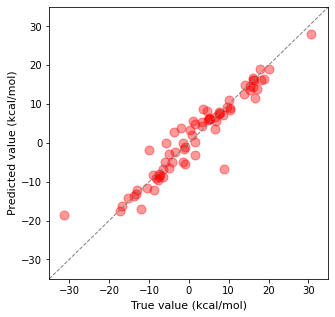

In [225]:
import random


print("Plotting the sanity check results...\n")
fig, axes = plt.subplots(1, 1, figsize=(5,5))

y_pred = model.predict(X_testset)

x = np.linspace(-35, 35, 100)
#plt.plot(Y_testset, y_pred, 'ro')
#plt.plot(Y_testset, y_pred, 'ro', markerfacecolor='none', markersize=5, markeredgewidth=2, alpha=0.5)
plt.plot(Y_testset, y_pred, 'ro',  markersize=9, alpha=0.4)
#ax1.scatter(Y_testset, y_pred, facecolor='none', s=20, color='chocolate')
plt.xlabel(r'True value (kcal/mol)', fontsize=11)
plt.ylabel(r'Predicted value (kcal/mol)', fontsize=11)
plt.plot(x,x, 'k-', linestyle='--', color='gray', linewidth=1)
plt.xlim(-35, 35)
plt.ylim(-35, 35)

plt.savefig('scatterplot.png', dpi=800)
plt.show()

In [226]:
mae = mean_absolute_error(Y_testset, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.1952015981735182


In [242]:
clf.best_params_
model = clf.best_estimator_

In [243]:
features = list(X.columns)
features

['NBO_C_diazo', 'NBO_C_carbonyl', 'HOMO']

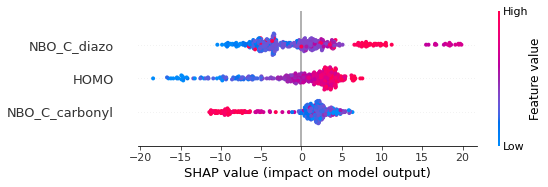

In [229]:
import matplotlib.pyplot as plt
import xgboost
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_trainset)
shap.summary_plot(shap_values,feature_names=features , show=False)

plt.savefig('SHAP.png', dpi=800)
plt.show()

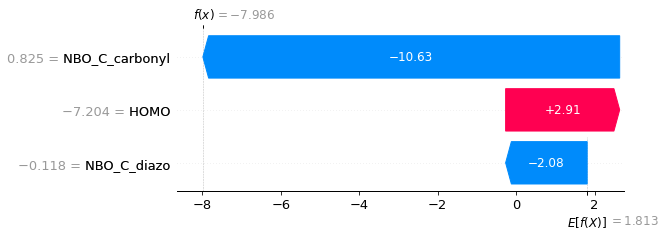

In [241]:
molidx = 257
shap_object = shap.Explanation(base_values = shap_values[molidx][0].base_values,
                               values = shap_values[molidx].values,
                               feature_names = X.columns,
                               data = shap_values[molidx].data)

shap.plots.waterfall(shap_object)

In [232]:
# Split the data into training and test sets first (80% training, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate R^2 scores for training, validation, and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Linear Regression - R^2 for training set: {r2_train}")
print(f"Linear Regression - R^2 for validation set: {r2_val}")
print(f"Linear Regression - R^2 for test set: {r2_test}")


# Optionally, display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Linear Regression - R^2 for training set: 0.5207498403262849
Linear Regression - R^2 for validation set: 0.5831731832075722
Linear Regression - R^2 for test set: 0.6816507536889802
                Coefficient
NBO_C_diazo       12.126797
NBO_C_carbonyl   -35.814408
HOMO              10.803645


In [233]:
# Assuming data_new and target_vars are defined
data_new = data_new.sample(frac=1)
rnd = random.randint(0, 999)

# Split into training and test sets with test_size=0.15
train_set, test_set = train_test_split(data_new, shuffle=True, random_state=rnd, test_size=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# Separate features and target variables for train and test sets
X_trainset = train_set.drop(columns=target_vars).to_numpy()
Y_trainset = train_set[target_vars].to_numpy()

X_testset = test_set.drop(columns=target_vars).to_numpy()
Y_testset = test_set[target_vars].to_numpy()

# Further split the training set into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_trainset, Y_trainset, test_size=0.25, random_state=42)   

# Initializing the RandomForestRegressor with oob_score=True
model = RandomForestRegressor(n_estimators=200, random_state=42, oob_score=True)
#model.fit(X_train, y_train)
model.fit(X_trainset, Y_trainset.ravel())


# Generate predictions
y_train_pred = model.predict(X_trainset)
y_test_pred = model.predict(X_testset)

# Get OOB predictions
oob_predictions = model.oob_prediction_
oob_labels = Y_trainset.ravel()

# Calculate MAE
mae_train = mean_absolute_error(Y_trainset, y_train_pred)
mae_test = mean_absolute_error(Y_testset, y_test_pred)

# Get the OOB score
oob_score = model.oob_score_



Plotting the sanity check results...



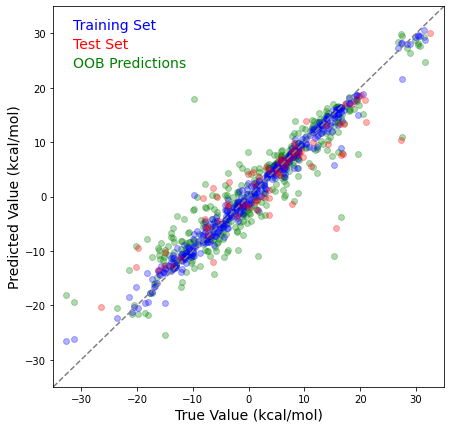

In [235]:
print("Plotting the sanity check results...\n")
fig, ax = plt.subplots(figsize=(7, 7))

# Scatter plot for OOB predictions
# The OOB predictions are from the training set itself, so we'll plot them separately.
ax.scatter(oob_labels, oob_predictions, c='green', label='OOB Predictions', alpha=0.3, s=35)

# Scatter plot for training set
ax.scatter(Y_trainset, y_train_pred, c='blue', label='Training Set', alpha=0.3, s=35)

# Scatter plot for test set
ax.scatter(Y_testset, y_test_pred, c='red', label='Test Set', alpha=0.3, s=35)

x = np.linspace(-35, 35, 100)
# Add the diagonal line
#x = np.linspace(min(Y_trainset.min(), Y_testset.min()), max(Y_trainset.max(), Y_testset.max()), 100)
ax.plot(x, x, 'k--', color='gray')

# Labeling the axes
ax.set_xlabel('True Value (kcal/mol)', fontsize=14)
ax.set_ylabel('Predicted Value (kcal/mol)', fontsize=14)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
#ax.set_xlim(min(Y_trainset.min(), Y_testset.min()), max(Y_trainset.max(), Y_testset.max()))
#ax.set_ylim(min(Y_trainset.min(), Y_testset.min()), max(Y_trainset.max(), Y_testset.max()))

# Add legend
#ax.legend()
# Annotate the plot with larger font sizes
#font_properties = {'fontsize': 14, 'fontweight': 'bold'}

font_properties = {'fontsize': 14, 'fontweight': 'normal'}

# Add annotations in the top-left corner without background color
ax.annotate('Training Set', xy=(0.05, 0.97), xycoords='axes fraction', 
            horizontalalignment='left', verticalalignment='top', color='blue', **font_properties)
ax.annotate('Test Set', xy=(0.05, 0.92), xycoords='axes fraction', 
            horizontalalignment='left', verticalalignment='top', color='red', **font_properties)
ax.annotate('OOB Predictions', xy=(0.05, 0.87), xycoords='axes fraction', 
            horizontalalignment='left', verticalalignment='top', color='green', **font_properties)

# Save and show plot
plt.savefig('scatterplot_colored.png', dpi=800)
plt.show()

In [254]:
X_df = pd.DataFrame(X, columns=['NBO_C_diazo', 'NBO_C_carbonyl', 'HOMO'])

In [255]:
db[['R1', 'R2']] = db['name'].str.split('_', expand=True)

In [256]:
best_model = clf.best_estimator_

In [257]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_df)

In [258]:
# Convert R1 and R2 to numeric and ensure alignment
db['R1'] = pd.to_numeric(db['R1'], errors='coerce')
db['R2'] = pd.to_numeric(db['R2'], errors='coerce')

In [259]:
db['R1_label'] = db['R1'].map(name_mapping)
db['R2_label'] = db['R2'].map(name_mapping)

In [260]:
# Ensure X_df and db are aligned
if len(X_df) != len(db):
    raise ValueError("X_df and db have different lengths. Ensure they are aligned.")

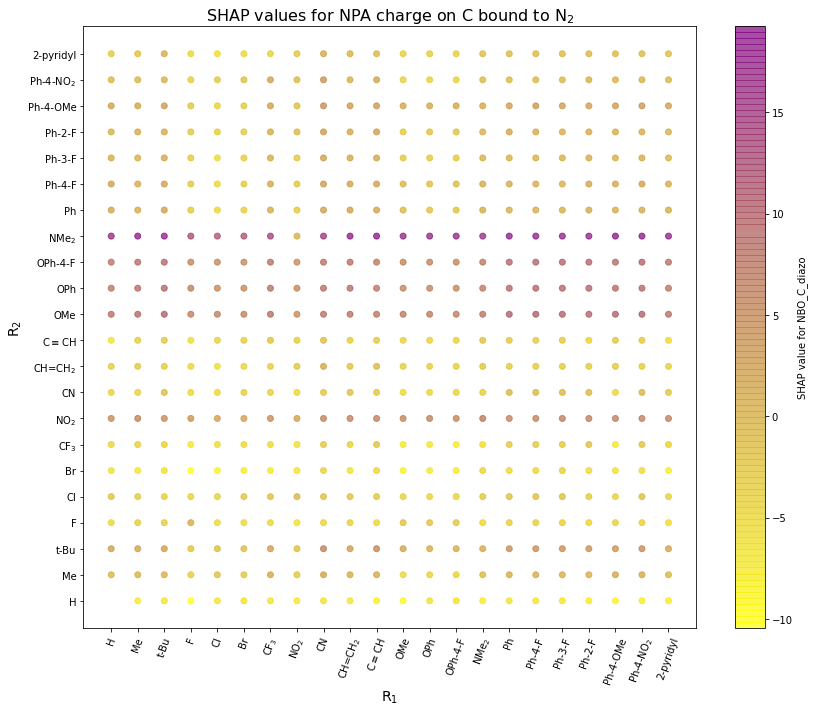

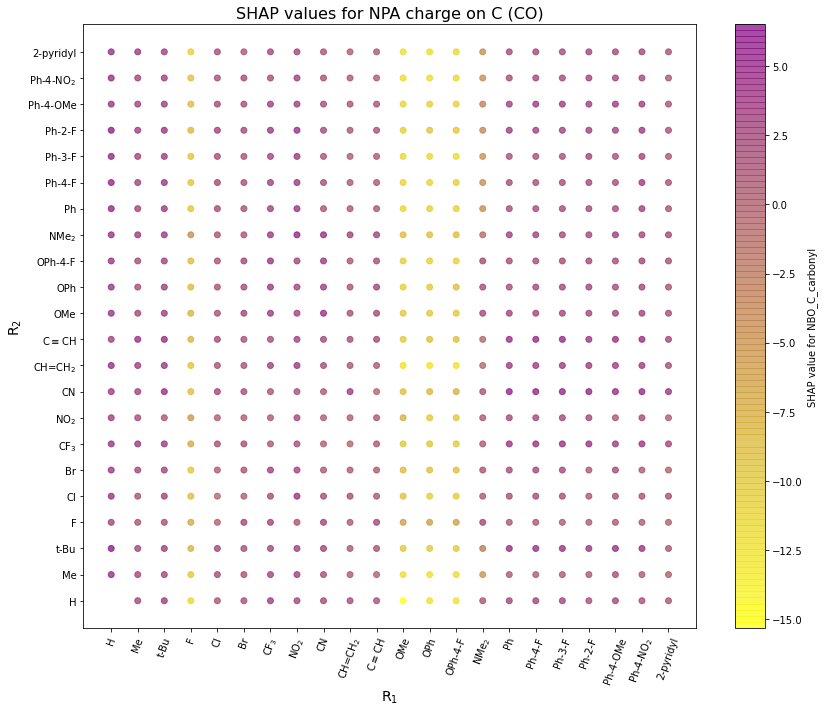

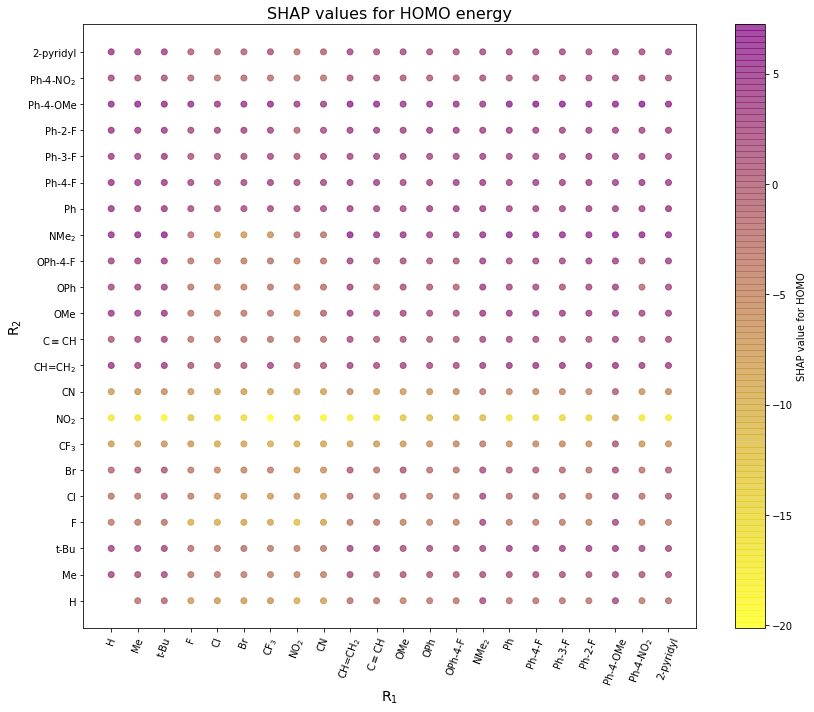

In [264]:
X_df = pd.DataFrame(X, columns=['NBO_C_diazo', 'NBO_C_carbonyl', 'HOMO'])

# Create a SHAP explainer
explainer = shap.Explainer(best_model)
shap_values = explainer(X_df)

# Define a custom color map: yellow to purple
colors = ["yellow", "purple"]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = "yellow_purple"
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Define feature indices for second and third features
feature_indices = [0, 1, 2]  # Index for the features

# Check the structure of SHAP values
if isinstance(shap_values, shap.explainers._tree.Explanation):
    shap_values_array = shap_values.values
else:
    shap_values_array = shap_values

# Mapping of feature names to new titles
title_mapping = {
    'NBO_C_diazo': r'SHAP values for NPA charge on C bound to N$_2$',
    'NBO_C_carbonyl': r'SHAP values for NPA charge on C (CO)',
    'HOMO': r'SHAP values for HOMO energy'
}


name_mapping = {
    1: 'H', 2: 'Me', 3: 't-Bu', 4: 'F', 5: 'Cl', 6: 'Br', 
    7: r'CF$_3$', 8: r'NO$_2$', 9: 'CN', 10: r'CH=CH$_2$', 
    11: 'C$\equiv$CH', 12: 'OMe', 13: 'OPh', 14: 'OPh-4-F', 
    15: r'NMe$_2$', 16: 'Ph', 17: 'Ph-4-F', 18: 'Ph-3-F', 
    19: 'Ph-2-F', 20: 'Ph-4-OMe', 21: r'Ph-4-NO$_2$', 
    22: '2-pyridyl'
}

for feature_index in feature_indices:
    feature = X_df.columns[feature_index]
    
    # Extract SHAP values for the current feature
    try:
        shap_values_for_feature = shap_values_array[:, feature_index]
    except IndexError:
        print(f"IndexError: {feature_index} is out of bounds. SHAP values array shape: {shap_values_array.shape}")
        continue
    
    # Create a scatter plot
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(db['R1'], db['R2'], c=shap_values_for_feature, cmap=cm, alpha=0.7)
    plt.colorbar(scatter, label=f'SHAP value for {feature}')
    
    # Set labels with R$_1$ and R$_2$ with larger font size
    plt.xlabel(r'R$_1$', fontsize=14)
    plt.ylabel(r'R$_2$', fontsize=14)
    
    # Set the title based on the feature name
    plt.title(title_mapping[feature], fontsize=16)

    # Customize x and y ticks to show labels and rotate x-axis labels
    plt.xticks(ticks=np.unique(db['R1']), labels=[name_mapping.get(x, x) for x in np.unique(db['R1'])], rotation=70)
    plt.yticks(ticks=np.unique(db['R2']), labels=[name_mapping.get(x, x) for x in np.unique(db['R2'])])

    plt.tight_layout()
    plt.savefig(f'SHAP_{feature}_R1_R2.png', dpi=800)
    plt.show()

In [262]:
# Initialize metrics storage
train_mae_list = []
val_mae_list = []
oob_mae_list = []

train_r2_list = []
val_r2_list = []
oob_score_list = []

# Number of repetitions
n = 256

for i in range(n):
    print(f"Iteration {i+1}/{n}")
    rnd = random.randint(0, 999)

    # Split the entire data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=rnd)
    
    # Initialize the model
    model = RandomForestRegressor(oob_score=True, random_state=rnd)
    
    # Set up GridSearchCV
    clf = GridSearchCV(model, parameters, cv=10, verbose=0, n_jobs=-1, scoring='neg_mean_squared_error')
    
    # Fit GridSearchCV
    clf.fit(X_train, y_train)
    
    # Get the best model from GridSearchCV
    best_model = clf.best_estimator_
    
    # Predict and calculate MAE scores
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_test, y_test_pred)
    
    if hasattr(best_model, 'oob_prediction_'):
        oob_mae = mean_absolute_error(y_train, best_model.oob_prediction_)
    else:
        oob_mae = np.nan

    # Append MAE scores to the lists
    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)
    train_r2_list.append(train_r2)
    val_r2_list.append(val_r2)
    oob_mae_list.append(oob_mae)
    oob_score_list.append(best_model.oob_score_)

# Calculate the average MAE metrics
avg_train_mae = np.mean(train_mae_list)
avg_val_mae = np.mean(val_mae_list)
avg_oob_mae = np.mean(oob_mae_list)

std_train_mae = np.std(train_mae_list)
std_val_mae = np.std(val_mae_list)
std_oob_mae = np.std(oob_mae_list)


# Calculate the average R2 metrics
avg_train_r2 = np.mean(train_r2_list)
avg_val_r2 = np.mean(val_r2_list)
avg_oob_r2 = np.mean(oob_score_list)

std_train_r2 = np.std(train_r2_list)
std_val_r2 = np.std(val_r2_list)
std_oob_r2 = np.std(oob_score_list)


Iteration 1/2
Iteration 2/2


In [150]:
# Print the average metrics
print("\033[1;35m Average MAE Training Score: {:.2f}, std= {:.2f}".format(avg_train_mae, std_train_mae))
print("\033[1;35m Average MAE Validation Score: {:.2f}, std= {:.2f}".format(avg_val_mae, std_val_mae))
print("\033[1;35m Average OOB MAE Score: {:.2f}, std= {:.2f}\n".format(avg_oob_mae, std_oob_mae))
print("\033[1;35m Average R2 Training Score: {:.2f}, std= {:.2f}".format(avg_train_r2, std_train_r2))
print("\033[1;35m Average R2 Validation Score: {:.2f}, std= {:.2f}".format(avg_val_r2, std_val_r2))
print("\033[1;35m Average OOB Score: {:.2f}, std= {:.2f}\n".format(avg_oob_r2, std_oob_r2))

 Average MAE Training Score: 1.03, std= 0.03
 Average MAE Validation Score: 2.79, std= 0.34
 Average OOB MAE Score: 2.81, std= 0.08

 Average R2 Training Score: 0.98, std= 0.00
 Average R2 Validation Score: 0.85, std= 0.06
 Average OOB Score: 0.86, std= 0.01



(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

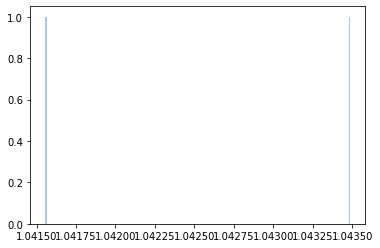

In [265]:
plt.hist(train_mae_list, bins=256, alpha=0.4)

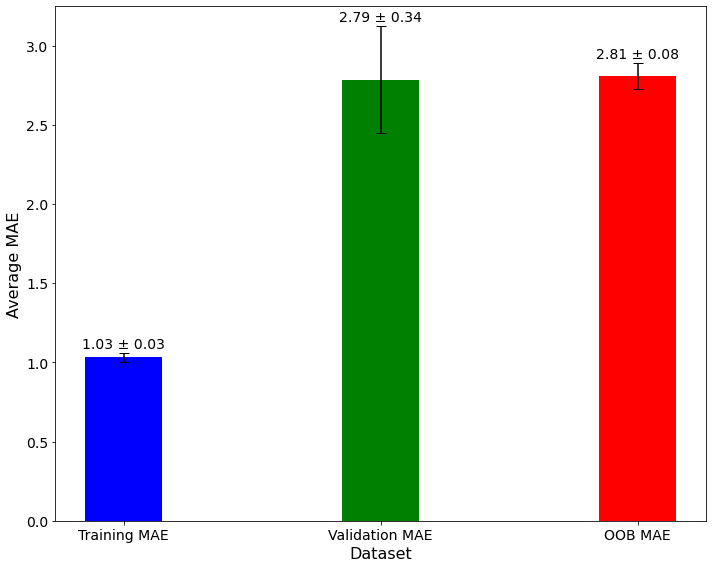

In [251]:
scores = ['Training MAE', 'Validation MAE', 'OOB MAE']
average_scores = [avg_train_mae, avg_val_mae, avg_oob_mae]
std_devs = [std_train_mae, std_val_mae, std_oob_mae]

# Create the bar plot with narrow columns
plt.figure(figsize=(10, 8))
bar_width = 0.3  # Adjust the width of the bars
bars = plt.bar(scores, average_scores, yerr=std_devs, capsize=5, color=['blue', 'green', 'red'], width=bar_width)

# Set x and y labels with increased font size
plt.xlabel('Dataset', fontsize=16)  # Increased from 14 to 16
plt.ylabel('Average MAE', fontsize=16)  # Increased from 14 to 16

# Remove the title caption
# plt.title('Average MAE Scores with Error Bars for Training, Validation, and OOB Sets')  # Removed

# Increase the font size for the bar labels
plt.xticks(fontsize=14)  # Increase x-axis labels font size
plt.yticks(fontsize=14)  # Increase y-axis labels font size

# Setting y-axis limit with a bit more space
plt.ylim(0, max(average_scores) + max(std_devs) + 0.1)

# Adding text annotations with increased font size
for bar, (v, std) in zip(bars, zip(average_scores, std_devs)):
    plt.text(bar.get_x() + bar.get_width() / 2, v + std + 0.01, f"{v:.2f} ± {std:.2f}", 
             ha='center', va='bottom', fontsize=14)  # Increased font size for text annotations

# Save the plot as a PNG file with high resolution
plt.tight_layout()
plt.savefig('average_mae_scores_with_error_bars.png', dpi=800)
plt.show()